In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [112]:
filename1='C:/Users/Admin/Desktop/INTERNSHIP/Train.csv'
filename2='C:/Users/Admin/Desktop/INTERNSHIP/Test.csv'
stores_train=pd.read_csv(filename1)
stores_test=pd.read_csv(filename2)


In [113]:
stores_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [114]:
stores_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [115]:
stores_train.shape

(8523, 12)

In [116]:
stores_test.shape

(5681, 11)

In [117]:
stores_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [119]:
missing_values1=stores_train.isnull().sum()

In [120]:
missing_values1

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [121]:
missing_values2=stores_test.isnull().sum()


In [122]:
missing_values2

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [90]:
stores_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [91]:
stores_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [92]:
stores_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [93]:
stores_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [127]:
missing_values1


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [146]:
print("Train:\n")
print(stores_train.isnull().sum(),"\n\n****Percentage****\n\n",stores_train.isnull().sum()/stores_train.shape[0] *100,"\n\n")
print("Test:\n")
print(stores_test.isnull().sum(),"\n\n****Percentage****\n\n",stores_test.isnull().sum()/stores_test.shape[0]*100,"\n\n")

Train:

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

****Percentage****

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Item_Identifier                 0
Item_Weight          

In [149]:
stores_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [150]:
stores_test.Item_Weight.value_counts()

10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Item_Weight, Length: 410, dtype: int64

In [153]:
stores_train.Outlet_Size.mode().values[0] #since it is categorical so mode

'Medium'

In [156]:
stores_test.Outlet_Size.mode().values[0]

'Medium'

In [161]:
stores_train['Outlet_Size'] = stores_train['Outlet_Size'].fillna(stores_train['Outlet_Size'].mode().values[0])

In [162]:
stores_train['Outlet_Size'].isnull().sum()

0

In [163]:
stores_test['Outlet_Size'] = stores_test['Outlet_Size'].fillna(stores_test['Outlet_Size'].mode().values[0])

In [164]:
stores_test['Outlet_Size'].isnull().sum()

0

Text(0.5, 1.0, 'Item_Weight Boxplot')

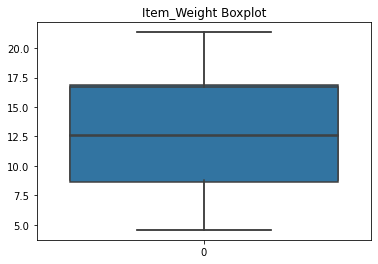

In [167]:
#since Item_weight is numerical values so we will check for the outliers 
sns.boxplot(data=stores_train['Item_Weight'])
plt.title("Item_Weight Boxplot")

Text(0.5, 1.0, 'Item_Weight Boxplot')

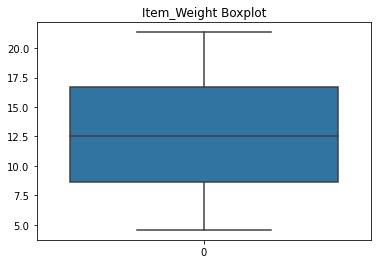

In [168]:
sns.boxplot(data=stores_test['Item_Weight'])
plt.title("Item_Weight Boxplot")

In [186]:
# As there is no outliesrs so we will fill with the mean values
stores_train['Item_Weight']=stores_train['Item_Weight'].fillna(stores_train['Item_Weight'].mean())

In [189]:
stores_test['Item_Weight']=stores_test['Item_Weight'].fillna(stores_test['Item_Weight'].dropna().mean())

In [187]:
stores_train['Item_Weight'].isnull().sum()

0

In [190]:
stores_test['Item_Weight'].isnull().sum()

0

In [191]:
stores_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [193]:
stores_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [198]:
#list of all the numeric columns
num = stores_train.select_dtypes('number').columns.to_list()


In [195]:
num

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [199]:
cat = stores_train.select_dtypes('object').columns.to_list()

In [200]:
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [201]:
[stores_train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

In [202]:
stores_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [203]:
stores_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [204]:
[stores_train[category].value_counts() for category in cat[1:]]

[Low Fat    5517
 Regular    3006
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type, dtype: int64,
 Supermarket Type1    5577
 Grocery 

In [205]:
[stores_test[category].value_counts() for category in cat[1:]]

[Low Fat    3668
 Regular    2013
 Name: Item_Fat_Content, dtype: int64,
 Snack Foods              789
 Fruits and Vegetables    781
 Household                638
 Frozen Foods             570
 Dairy                    454
 Baking Goods             438
 Canned                   435
 Health and Hygiene       338
 Meat                     311
 Soft Drinks              281
 Breads                   165
 Hard Drinks              148
 Starchy Foods            121
 Others                   111
 Breakfast                 76
 Seafood                   25
 Name: Item_Type, dtype: int64,
 OUT027    624
 OUT013    621
 OUT049    620
 OUT046    620
 OUT035    620
 OUT045    619
 OUT018    618
 OUT017    617
 OUT010    370
 OUT019    352
 Name: Outlet_Identifier, dtype: int64,
 Medium    3468
 Small     1592
 High       621
 Name: Outlet_Size, dtype: int64,
 Tier 3    2233
 Tier 2    1856
 Tier 1    1592
 Name: Outlet_Location_Type, dtype: int64,
 Supermarket Type1    3717
 Grocery Store         72

In [206]:
stores_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [207]:
stores_test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

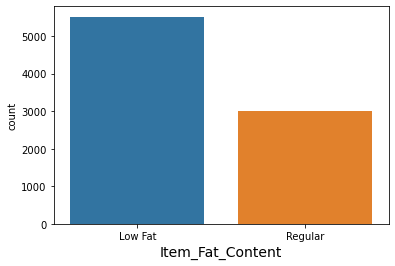

In [208]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=stores_train)
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

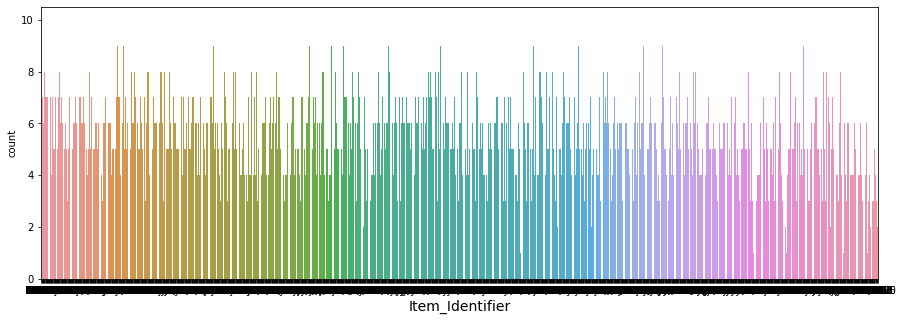

In [227]:
plt.figure(figsize=(15,5))
sns.countplot(x='Item_Identifier' , data=stores_train)
plt.xlabel('Item_Identifier', fontsize=14)
plt.show()

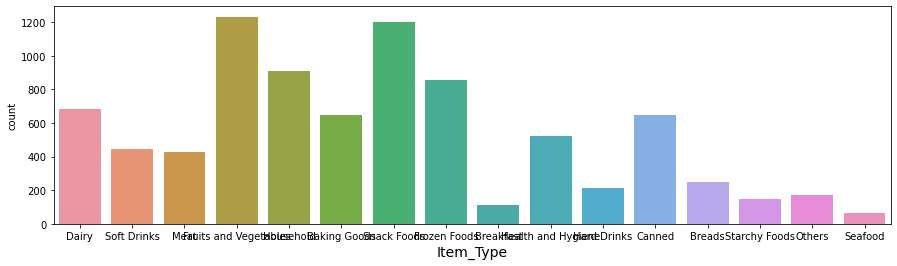

In [222]:
plt.figure(figsize=(15,4))
sns.countplot(x='Item_Type' , data=stores_train)
plt.xlabel('Item_Type', fontsize=14)
plt.show()

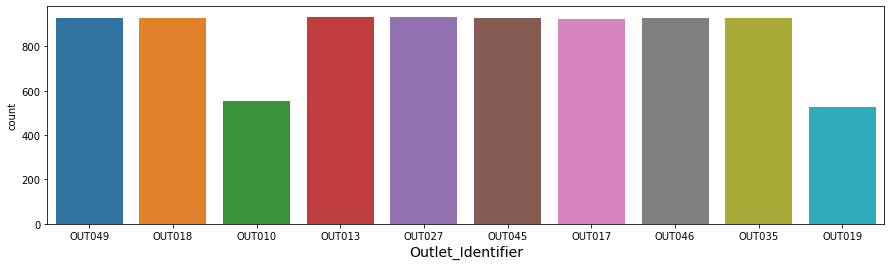

In [223]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=stores_train)
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

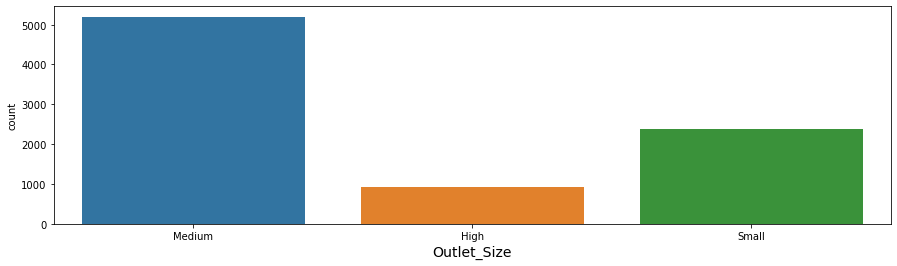

In [224]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Size' , data=stores_train)
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

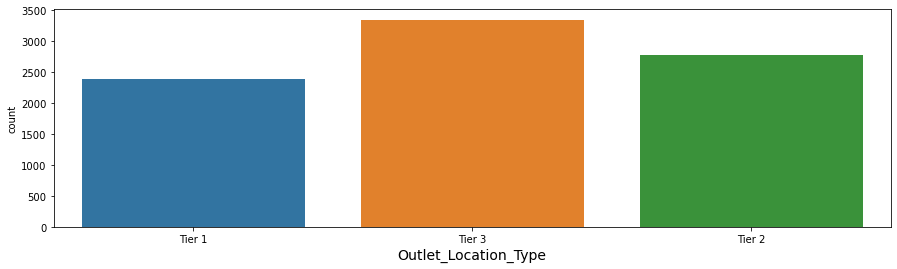

In [239]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Location_Type' , data=stores_train)
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

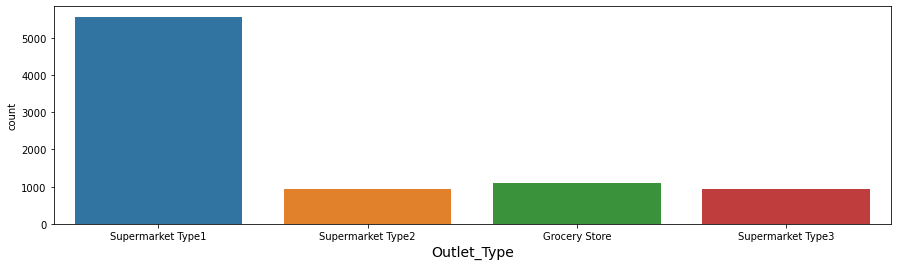

In [240]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Type' , data=stores_train)
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

In [238]:
num

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

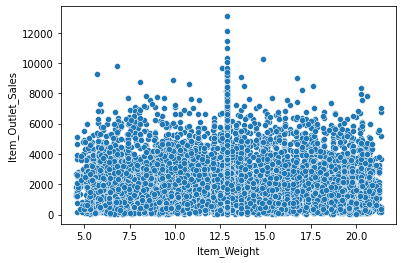

In [232]:
sns.scatterplot(y=stores_train['Item_Outlet_Sales'],x=stores_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

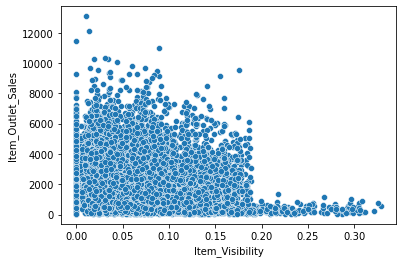

In [233]:
sns.scatterplot(y=stores_train['Item_Outlet_Sales'],x=stores_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

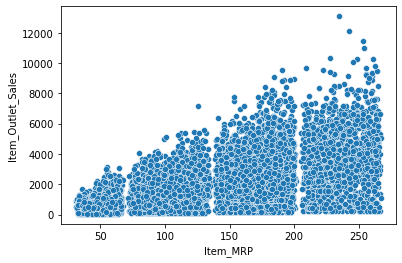

In [234]:
sns.scatterplot(y=stores_train['Item_Outlet_Sales'],x=stores_train['Item_MRP'])

<AxesSubplot:>

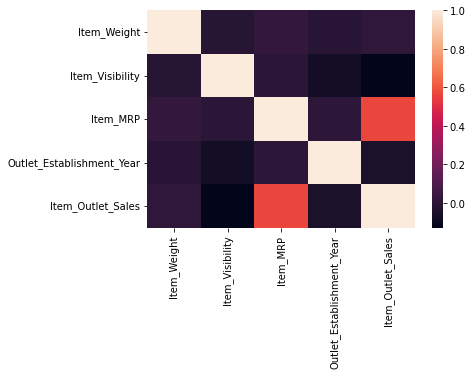

In [242]:
sns.heatmap(stores_train.corr()) #MRP is highly correlated with Item_outlet_sales

In [243]:
Ordinal variables:

Item_Fat_Content
Outlet_Size
Outlet_Location_Type

Nominal variables:

Item_Identifier
Item_Type
Outlet_Identifier
Outlet_Type

In [250]:

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    stores_train[i] = le.fit_transform(stores_train[i])
    stores_train[i] = le.fit_transform(stores_train[i])
    
stores_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052


In [255]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_oh = pd.DataFrame(OH_encoder.fit_transform(stores_train[cols])).astype('int64')
test_oh = pd.DataFrame(OH_encoder.fit_transform(stores_test[cols])).astype('int64')


#get feature columns
train_oh.columns = OH_encoder.get_feature_names(cols)
test_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
train_oh.index = stores_train.index
test_oh.index = stores_test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
train_fe = pd.concat([stores_train, train_oh], axis=1)
test_fe = pd.concat([stores_test, test_oh], axis=1)

In [256]:
train_fe

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,...,0,0,0,1,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,...,0,0,0,0,0,0,0,1,0,0
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,...,0,0,0,1,0,0,0,0,1,0


In [257]:
train_fe  = train_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_fe = test_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [259]:
train_fe

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,1,2,443.4228,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1,0,2097.2700,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1,2,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,0,2,994.7052,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,2778.3834,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,1,1,549.2850,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2,1,1193.1136,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,1,2,1845.5976,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [263]:
y = train_fe['Item_Outlet_Sales']
X = train_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [266]:
from sklearn.tree import DecisionTreeRegressor
model_DT=DecisionTreeRegressor(max_depth=3)
#train the algorithm
model_DT.fit(X_train,y_train)

#check the r2 score of the model(accuracy)
model_DT.score(X_train,y_train)#train data



0.5321588591128588

In [267]:
model_DT.score(X_test,y_test)#test data

0.5243104043904456

In [270]:
#model
model_RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
model_RF.fit(X_train,y_train)

#check the r2 score of the model(accuracy)
model_RF.score(X_train,y_train)#train data

0.3620746618484424

In [271]:
model_RF.score(X_test,y_test)#test data

0.32435711095726916